In [1]:
from qiskit import *
from math import pi,log


## Code Given in the Appendix B of the Paper

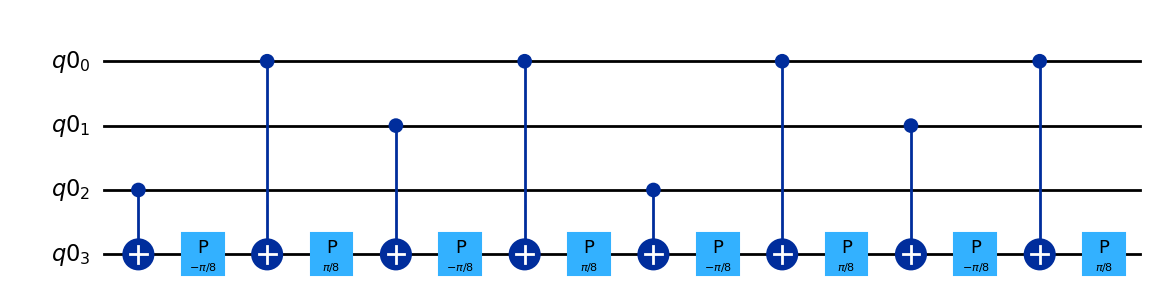

In [2]:
# code for mcrz gate

q = QuantumRegister(4)
qc = QuantumCircuit(q)

def new_mcrz(qc,theta,q_controls,q_target): 
    n = len(q_controls)
    newtheta = -theta/2**n
    a = lambda n: log(n-(n&(n-1)),2)
    qc.cx(q_controls[n-1],q_target)
    qc.p(theta=newtheta,qubit=q_target) # changed from u1 to p gate according to be consistent with newer version of qiskit
    for i in range(1,2**(n)):
        qc.cx(q_controls[int(a(i))],q_target)
        qc.p(theta=(-1)**i*newtheta,qubit=q_target)  # changed from u1 to p 

QuantumCircuit.new_mcrz = new_mcrz

qc.new_mcrz(pi,q_controls=[q[0],q[1],q[2]],q_target=q[3])
qc.draw('mpl')

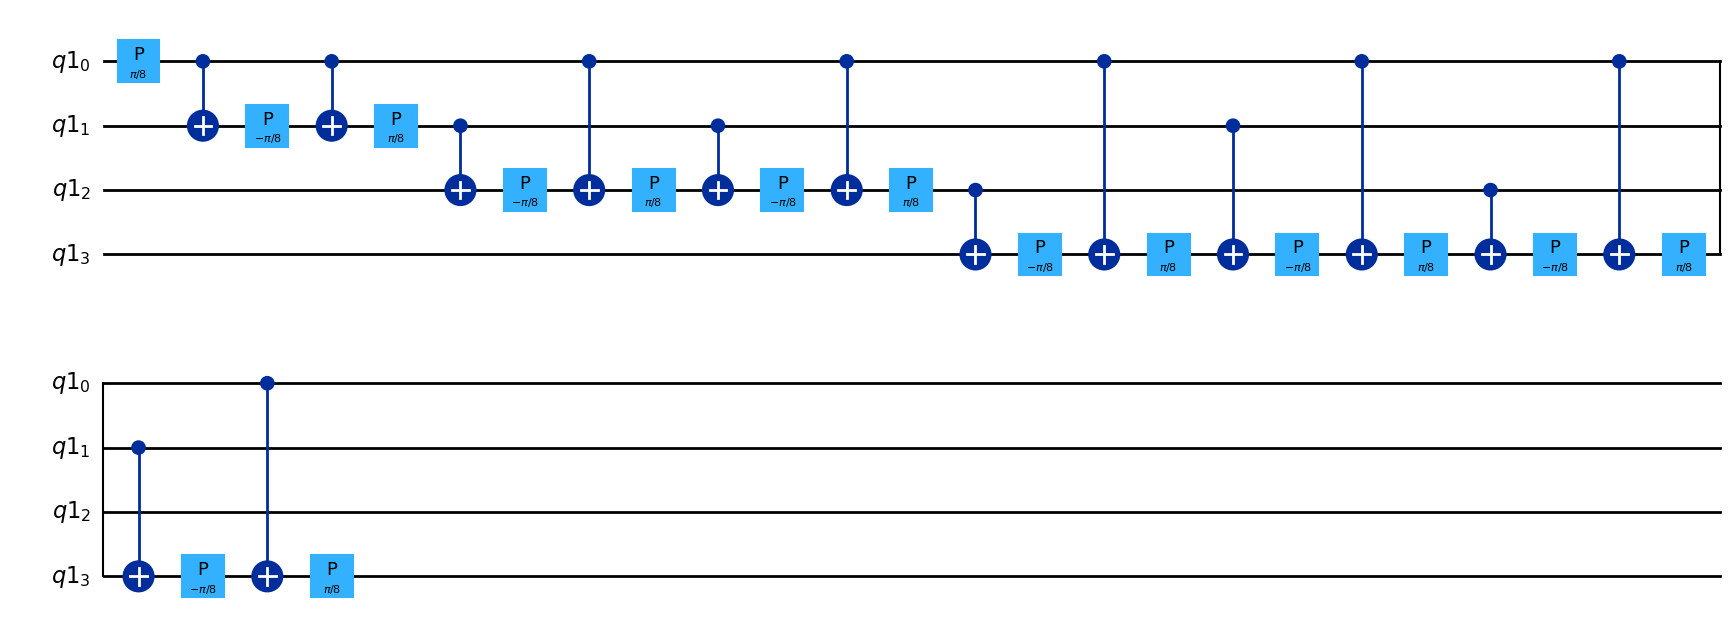

In [3]:
# code for mcz gate

q = QuantumRegister(4)
qc = QuantumCircuit(q)

def new_mcz(qc,q_controls,q_target):
    L = q_controls + [q_target]
    n = len(L)
    qc.p(theta=pi/2**(n-1),qubit=L[0])
    for i in range(2,n+1):
        qc.new_mcrz(pi/2**(n-i),L[0:i-1],L[i-1])

QuantumCircuit.new_mcz = new_mcz
qc.new_mcz([q[0],q[1],q[2]],q[3])
qc.draw('mpl')

### Current versions of Qiskit allows direct implementation of these gates.

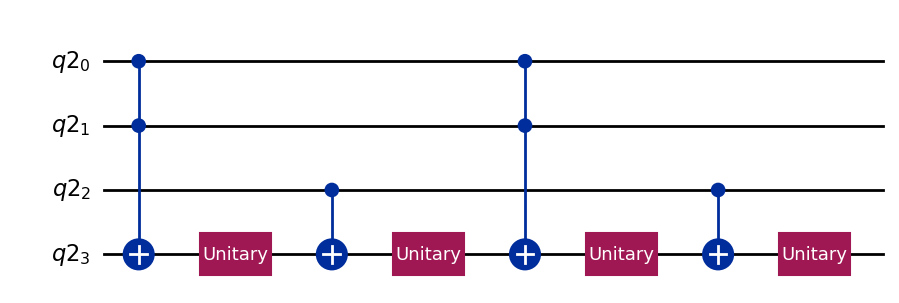

In [4]:
q = QuantumRegister(4)
qc = QuantumCircuit(q)

qc.mcrz(lam=pi,q_controls=[q[0],q[1],q[2]],q_target=q[3])
qc.draw('mpl')

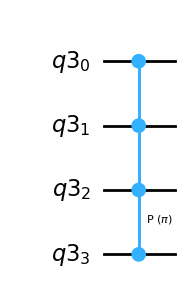

In [5]:
# mcz gate

q = QuantumRegister(4)
qc = QuantumCircuit(q)

qc.mcp(lam=pi,control_qubits=[q[0],q[1],q[2]],target_qubit=q[3])
qc.draw('mpl')

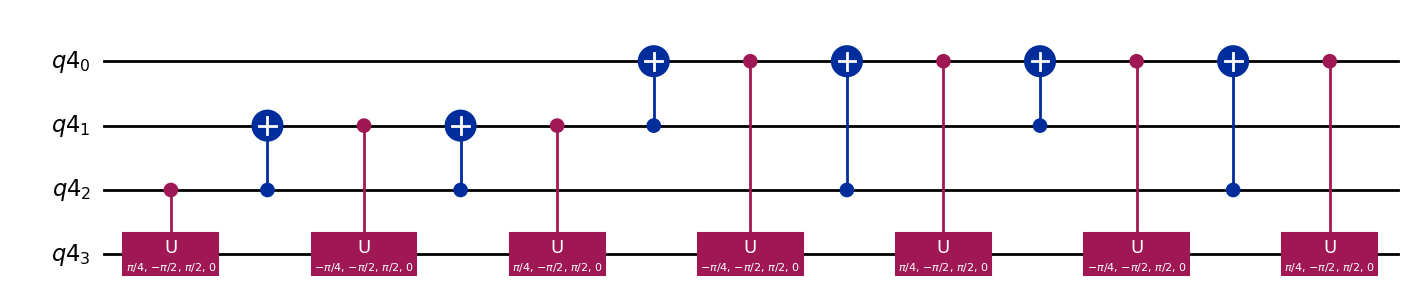

In [6]:
# mcrx gate
q = QuantumRegister(4)
qc = QuantumCircuit(q)


qc.mcrx(theta=pi,q_controls=[q[0],q[1],q[2]],q_target=q[3])
qc.draw('mpl')

[Further references for the multiqubit gates that qiskit currently support](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#methods-to-add-standard-instructions)

In [7]:
import qiskit
qiskit.__version__

'1.4.2'